In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
if os.path.exists('/kaggle/working/submission.csv'):
    os.remove('/kaggle/working/submission.csv')
    print("File deleted.")
else:
    print("File not found.")

File not found.


import zipfile

zip_path = "/kaggle/input/quora-question-pairs/train.csv.zip"
extract_path = "/kaggle/working/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
df.shape

(404290, 6)

In [4]:
df = df.sample(30000)

In [5]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
281804  281804  239003   95939   
380952  380952  512626  512627   
89012    89012  112859   46708   
50043    50043   68380   88978   
258868  258868   28962  313170   
...        ...     ...     ...   
313187  313187  437726  437727   
176318  176318  271304  271305   
21161    21161   39867   24068   
97319    97319  161941  123488   
346669  346669  211482  228106   

                                                question1  \
281804               What's your favorite movies and why?   
380952      What is "Testing in production" as a concept?   
89012   How in heaven's name would I dress like a work...   
50043   What are some tips for booking Tatkal ticket o...   
258868               How can I increase my writing speed?   
...                                                   ...   
313187  Is it better to pursue law in NUALS Kochi or C...   
176318    What is the most interesting part in your life?   
21161   Wh

In [6]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
df['is_duplicate'].value_counts()

is_duplicate
0    18867
1    11133
Name: count, dtype: int64

In [9]:
df['is_duplicate'].count()

30000

Text(0, 0.5, 'Frequency')

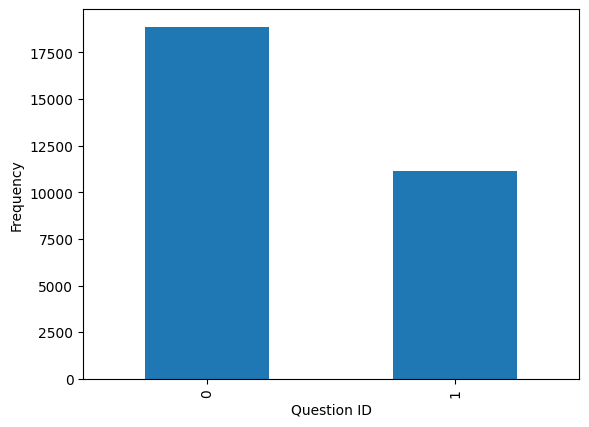

In [10]:
import matplotlib.pyplot as plt
df['is_duplicate'].value_counts().plot(kind='bar')
plt.xlabel("Question ID")
plt.ylabel("Frequency")

In [11]:
# Unique questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Number of unique questions {np.unique(qid).shape[0]}')

# Repeted questions
x = qid.value_counts()>1
print(f'Number of questions repeated {x[x].shape[0]}')


Number of unique questions 55277
Number of questions repeated 3483


In [12]:
qid.value_counts().values

array([12,  8,  8, ...,  1,  1,  1])

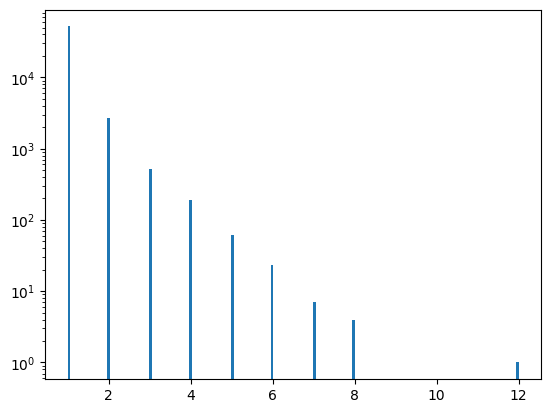

In [13]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

qid1 , qid2, question1, question2, is_duplicate <br>
              bow        bow        randomforest

In [14]:
# Feature engineering

In [15]:
ques_df = df[['question1','question2']]
ques_df.head()


,question1,question2
281804,What's your favorite movies and why?,Which is your favorite movie?
380952,"What is ""Testing in production"" as a concept?",What is a test product concept?
89012,How in heaven's name would I dress like a work...,How would I dress like a workout guy from the ...
50043,What are some tips for booking Tatkal ticket o...,What is the fastest payment option on IRCTC to...
258868,How can I increase my writing speed?,How can I increase my writing speed magically?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Merge all questions into one list
questions = list(ques_df['question1'].fillna("")) + list(ques_df['question2'].fillna(""))

# Vectorize
cv = CountVectorizer(max_features=3000)
q_vectors = cv.fit_transform(questions).toarray()

# Split back into q1 and q2 arrays
half = len(q_vectors) // 2
q1_arr, q2_arr = np.vsplit(q_vectors, [half])

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
281804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
380952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97319,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
281804,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
380952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
97319,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# EDA


### Data Preprocessing & Transformation


In [20]:
temp_df.iloc[:,0:-1].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
#importing and splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2, random_state=2)



### Model Selection & Evaluation

### Classification Models / Regression Models

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7415

In [24]:
#Random Forest Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.733

In [26]:
test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')
print(test_df.shape)

#test_df = test_df.sample(2345796)
print(test_df.shape)

/tmp/ipykernel_13/787706316.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')


(3563475, 3)
(3563475, 3)


In [27]:
test_df.duplicated().sum()

955535

test_df = test_df.drop_duplicates()

In [28]:
print(test_df.shape)

(3563475, 3)


In [29]:
# Step 1: Fit vectorizer on training data
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
train_questions = list(test_df['question1'].fillna('')) + list(test_df['question2'].fillna(''))
cv.fit(train_questions)

CountVectorizer(max_features=3000)

In [30]:
from scipy.sparse import hstack

In [31]:
# Ensure test_questions is built correctly
q1_test = test_df['question1'].fillna('')
q2_test = test_df['question2'].fillna('')

# Vectorize separately using the same trained vectorizer
# Step 2: Transform test data
q1_test_vec = cv.transform(test_df['question1'].fillna(''))
q2_test_vec = cv.transform(test_df['question2'].fillna(''))

In [32]:
# Horizontally stack the sparse matrices
X_test = hstack([q1_test_vec, q2_test_vec])

model.fit(X_train,y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Ensure shape matches
assert len(y_pred) == len(test_df), "Mismatch in prediction and test_df lengths!"

# Create a clean submission
submission = pd.DataFrame({
    'test_id': test_df['test_id'],
    'is_duplicate': y_pred.astype(int)  # or float if regression
})


### Sanity check for duplicates
assert submission['test_id'].is_unique, "Duplicate test_id values found!"

In [33]:
if os.path.exists('/kaggle/working/submission.csv'):
    os.remove('/kaggle/working/submission.csv')
    print("File deleted.")
else:
    print("File not found.")

submission = submission.drop_duplicates(subset='test_id')  # Just in case

assert submission['test_id'].is_unique, "Still has duplicate test_id values!"

# Save
submission.to_csv('submission.csv', index=False)

File not found.



### Vectorize test questions (keep sparse!)
test_questions = list(test_df['question1'].fillna('')) + list(test_df['question2'].fillna(''))
test_vectors = cv.transform(test_questions)  # DO NOT call .toarray()

### Split into two sparse matrices
q1_test, q2_test = test_vectors[:len(test_df)], test_vectors[len(test_df):]

# Horizontally stack the sparse matrices
X_test = hstack([q1_test, q2_test])

### Predict on the Kaggle test set
y_pred = model.predict(X_test)
print("Predictions shape:", y_pred.shape)


submission = pd.DataFrame({
    'test_id': test_df['test_id'],    
    'is_duplicate': y_pred
})

submission.to_csv('submission.csv', index=False)